<a href="https://colab.research.google.com/github/SumitLaddha333/SoC_graphML/blob/main/Copy_of_CS224W_Colab_1_2022_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [ ]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

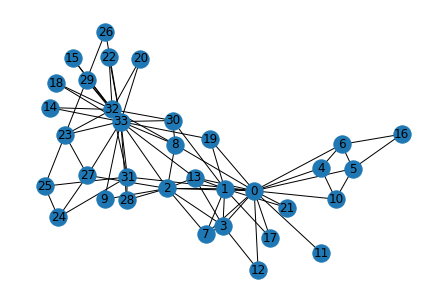

In [ ]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [7]:
import networkx as nx

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

def average_degree(num_edges, num_nodes):
    # Calculate the average node degree of the graph
    avg_degree = round(2 * num_edges / num_nodes)

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of the karate club network is {}".format(avg_degree))


Average degree of the karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [8]:
import networkx as nx

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

def average_clustering_coefficient(G):
    # Calculate the average clustering coefficient
    avg_cluster_coef = nx.average_clustering(G)

    # Round the result to 2 decimal places
    avg_cluster_coef = round(avg_cluster_coef, 2)

    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of the karate club network is {}".format(avg_cluster_coef))


Average clustering coefficient of the karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Page Rank measures importance of nodes in a graph using the link structure of the web. A “vote” from an important page is worth more. Specifically, if  a page $i$ with importance $r_i$ has $d_i$ out-links, then each link gets $\frac{r_i}{d_i}$ votes. Thus, the importance of a Page $j$, represented as $r_j$ is the sum of the votes on its in links.
$$r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i}$$, where $d_i$ is the out degree of node $i$.

The PageRank algorithm (used by Google) outputs a probability distribution which represent the likelihood of a random surfer clicking on links will arrive at any particular page. At each time step, the random surfer has two options
- With prob. $\beta$, follow a link at random
- With prob. $1- \beta$, jump to a random page

Thus, the importance of a particular page is calculated with the following PageRank equation:
 $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

Please complete the code block by implementing the above PageRank equation for node 0.

Note - You can refer to more information from the slides here - http://snap.stanford.edu/class/cs224w-2020/slides/04-pagerank.pdf




In [9]:
import networkx as nx

def one_iter_pagerank(G, beta, r0, node_id):
    # Calculate the PageRank value after one iteration for the input node
    r1 = beta * sum(r0 / G.degree[neighbor] for neighbor in G.neighbors(node_id))
    r1 += (1 - beta) / G.number_of_nodes()
    r1 = round(r1, 2)

    return r1

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))


The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [10]:
import networkx as nx

def closeness_centrality(G, node=5):
    # Calculate the raw (unnormalized) closeness centrality for the input node
    closeness = nx.closeness_centrality(G, u=node)
    closeness /= G.number_of_nodes() - 1
    closeness = round(closeness, 2)

    return closeness

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))


The node 5 has closeness centrality 0.01


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [ ]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.5460, 0.5905, 0.1964, 0.7431],
        [0.3519, 0.3220, 0.5103, 0.8243],
        [0.0411, 0.1229, 0.2697, 0.0375]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [11]:
import networkx as nx
import torch

def graph_to_edge_list(G):
    # Get the edge list of the input graph
    edge_list = list(G.edges)
    return edge_list

def edge_list_to_tensor(edge_list):
    # Transform the edge list to a torch.LongTensor
    edge_index = torch.LongTensor(edge_list).T
    return edge_index

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))


The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) are the negative edges in the karate club network? (10 Points)

"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

In [12]:
import random
import networkx as nx
import torch

def sample_negative_edges(G, num_neg_samples):
    # Sample num_neg_samples negative edges that do not exist in the graph
    num_nodes = G.number_of_nodes()
    max_num_edge = (num_nodes ** 2 - num_nodes) // 2  # upper triangle size
    num_neg_samples = min(num_neg_samples, max_num_edge - G.number_of_edges())

    neg_edges = []
    idx_to_edge = lambda idx: (idx // num_nodes, idx % num_nodes)
    for i in range(max_num_edge + num_nodes):
        edge = idx_to_edge(i)
        if edge[0] != edge[1] and edge not in G.edges:
            neg_edges.append(edge)

    neg_idxs = sorted(random.sample(range(len(neg_edges)), k=num_neg_samples))
    neg_edge_list = [neg_edges[i] for i in neg_idxs]

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of the following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

# Check if each edge can be negative
for edge in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    is_negative_edge = sorted(edge) not in G.edges
    print("Edge {} can be a negative edge: {}".format(edge, is_negative_edge))


The neg_edge_index tensor has shape torch.Size([2, 78])
Edge (7, 1) can be a negative edge: False
Edge (1, 33) can be a negative edge: True
Edge (33, 22) can be a negative edge: False
Edge (0, 4) can be a negative edge: False
Edge (4, 2) can be a negative edge: True


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [ ]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

We can select items from the embedding matrix, by using Tensor indices

In [15]:
import torch

def create_node_emb(num_node=34, embedding_dim=16):
    # Set the random seed to ensure reproducibility
    torch.manual_seed(1)

    # Create the node embedding matrix using torch.nn.Embedding
    emb = torch.nn.Embedding(num_node, embedding_dim)

    # Initialize the weights of the embedding matrix under uniform distribution
    emb.weight.data.uniform_(0, 1)

    return emb

# Create the node embedding matrix with 16-dimensional vectors for 34 nodes
emb = create_node_emb()

# Select an embedding in emb
id = torch.LongTensor([1])
print(emb(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb(ids))

# Get the shape of the embedding weight matrix
shape = emb.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initialized
ids = torch.LongTensor([0, 3])
print(emb(ids))


tensor([[0.2796, 0.3273, 0.3835, 0.2156, 0.6563, 0.5041, 0.1733, 0.2145, 0.6059,
         0.4929, 0.8539, 0.4242, 0.0949, 0.1302, 0.3532, 0.3893]],
       grad_fn=<EmbeddingBackward0>)
tensor([[0.2796, 0.3273, 0.3835, 0.2156, 0.6563, 0.5041, 0.1733, 0.2145, 0.6059,
         0.4929, 0.8539, 0.4242, 0.0949, 0.1302, 0.3532, 0.3893],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([34, 16])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
       grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [13]:
import torch

def create_node_emb(num_node=34, embedding_dim=16):
    # Set the random seed to ensure reproducibility
    torch.manual_seed(1)

    # Create the node embedding matrix using torch.nn.Embedding
    emb = torch.nn.Embedding(num_node, embedding_dim)

    # Initialize the weights of the embedding matrix under uniform distribution
    emb.weight.data.uniform_(0, 1)

    return emb

# Create the node embedding matrix with 16-dimensional vectors for 34 nodes
emb = create_node_emb()

# Example: Get the embeddings for node 0 and node 3
ids = torch.LongTensor([0, 3])
print(emb(ids))


tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

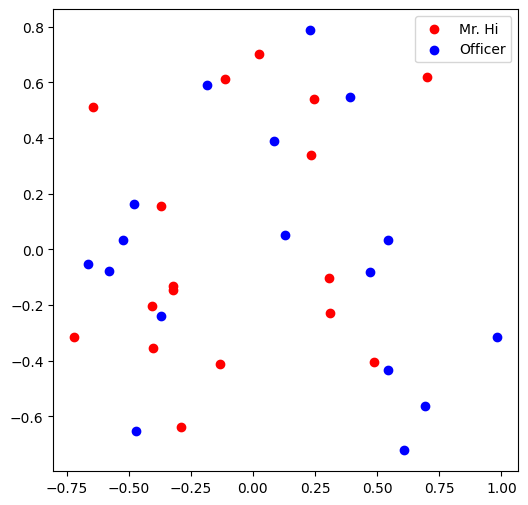

In [19]:
import torch
from sklearn.decomposition import PCA
import networkx as nx
import matplotlib.pyplot as plt

def create_node_emb(num_node=34, embedding_dim=16):
    # Set the random seed to ensure reproducibility
    torch.manual_seed(1)

    # Create the node embedding matrix using torch.nn.Embedding
    emb = torch.nn.Embedding(num_node, embedding_dim)

    # Initialize the weights of the embedding matrix under uniform distribution
    emb.weight.data.uniform_(0, 1)

    return emb

def visualize_emb(emb, G):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Assuming you have already loaded or defined the karate club network
G = nx.karate_club_graph()

# Create the node embedding matrix with 16-dimensional vectors for 34 nodes
emb = create_node_emb()

# Visualize the initial random embedding
visualize_emb(emb, G)


## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [21]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
    pred_label = pred.ge(0.5)
    accu = torch.sum(pred_label == label) / label.shape[0]
    accu = accu.item()
    return round(accu, 4)

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    epochs = 500
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):
        optimizer.zero_grad()  # Clear gradients.

        product = torch.sum(torch.mul(emb(train_edge[0]), emb(train_edge[1])), axis=1)
        pred = torch.sigmoid(product)
        loss = loss_fn(pred, train_label)
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

        with torch.no_grad():
            accu = accuracy(pred, train_label)
            if i % 100 == 0:
                print("Epoch {}: loss: {}, accuracy: {}".format(i, loss.item(), accu))

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Assuming you have already defined the emb, train_label, and train_edge variables
train(emb, loss_fn, sigmoid, train_label, train_edge)


NameError: ignored

## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

In [ ]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.